In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [3]:
df = pd.read_csv('2009_2022CompleteMag.csv')
df.head

<bound method NDFrame.head of              ID             Date_UTC  Extent IAGA  GEOLON  GEOLAT  MAGON  \
0             0  2009-01-01T00:00:00      60  RES  265.11   74.69 -36.10   
1             1  2009-01-01T00:01:00      60  RES  265.11   74.69 -36.10   
2             2  2009-01-01T00:02:00      60  RES  265.11   74.69 -36.10   
3             3  2009-01-01T00:03:00      60  RES  265.11   74.69 -36.10   
4             4  2009-01-01T00:04:00      60  RES  265.11   74.69 -36.10   
...         ...                  ...     ...  ...     ...     ...    ...   
7888315  525595  2022-12-31T23:55:00      60  RES  265.11   74.69 -35.54   
7888316  525596  2022-12-31T23:56:00      60  RES  265.11   74.69 -35.54   
7888317  525597  2022-12-31T23:57:00      60  RES  265.11   74.69 -35.54   
7888318  525598  2022-12-31T23:58:00      60  RES  265.11   74.69 -35.54   
7888319  525599  2022-12-31T23:59:00      60  RES  265.11   74.69 -35.54   

         MAGLAT    MLT  MCOLAT  IGRF_DECL     SZA  dbn_ne

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888320 entries, 0 to 7888319
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ID         int64  
 1   Date_UTC   object 
 2   Extent     int64  
 3   IAGA       object 
 4   GEOLON     float64
 5   GEOLAT     float64
 6   MAGON      float64
 7   MAGLAT     float64
 8   MLT        float64
 9   MCOLAT     float64
 10  IGRF_DECL  float64
 11  SZA        float64
 12  dbn_nez    float64
 13  dbe_nez    float64
 14  dbz_nez    float64
 15  dbn_geo    float64
 16  dbe_geo    float64
 17  dbz_geo    float64
dtypes: float64(14), int64(2), object(2)
memory usage: 1.1+ GB


ID                0
Date_UTC          0
Extent            0
IAGA              0
GEOLON            0
GEOLAT            0
MAGON             0
MAGLAT            0
MLT               0
MCOLAT            0
IGRF_DECL         0
SZA               0
dbn_nez      650564
dbe_nez      650564
dbz_nez      650564
dbn_geo      650564
dbe_geo      650564
dbz_geo      650564
dtype: int64

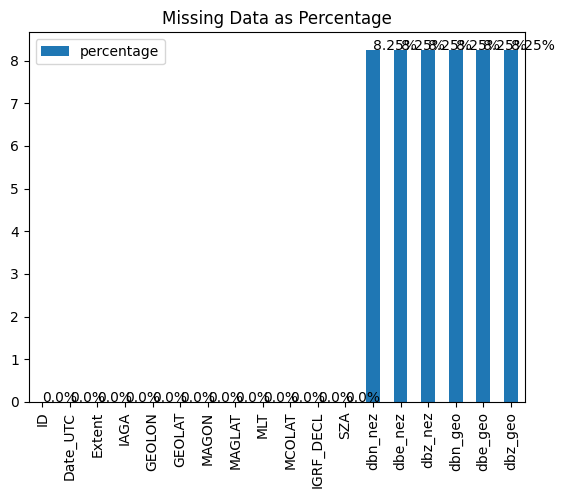

In [5]:
# missing values #
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
# print(missing_df)

# visualize missing value#
barchart = missing_df.plot.bar(y='percentage')
barchart.set_title("Missing Data as Percentage")
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%' )

/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_20385/867657294.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='ID', data=df, hue='dbn_nez')
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_20385/867657294.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='ID', data=df, hue='dbn_nez')
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_20385/867657294.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='ID', data=df, hue='dbn_nez')
/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_20385/867657294.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x='ID', data=df, hue='dbn_nez')
/var/folders/0q/7qqchjfd3h7g

<Axes: xlabel='ID', ylabel='Density'>

ValueError: Image size of 567x182940 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

['ID', 'Extent', 'GEOLON', 'GEOLAT', 'MAGON', 'MAGLAT', 'MLT', 'MCOLAT', 'IGRF_DECL', 'SZA', 'dbn_nez', 'dbe_nez', 'dbz_nez', 'dbn_geo', 'dbe_geo', 'dbz_geo']
['Date_UTC', 'IAGA']


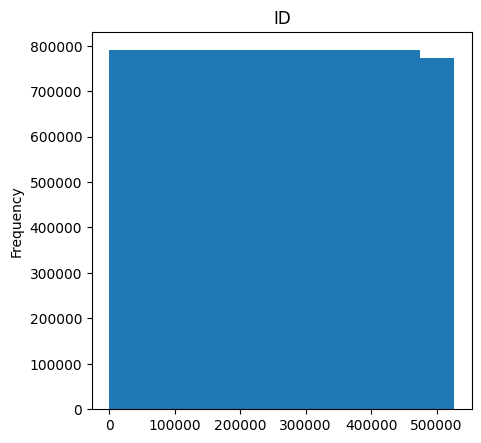

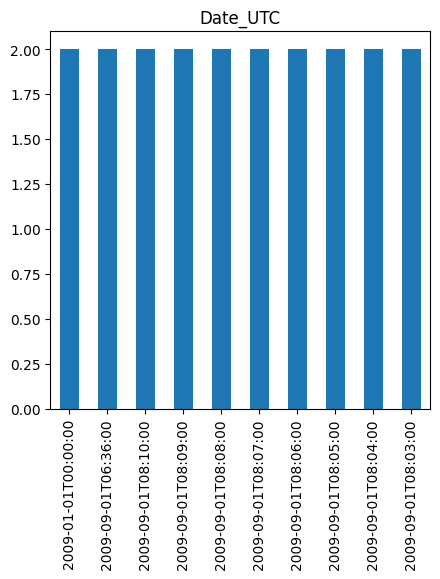

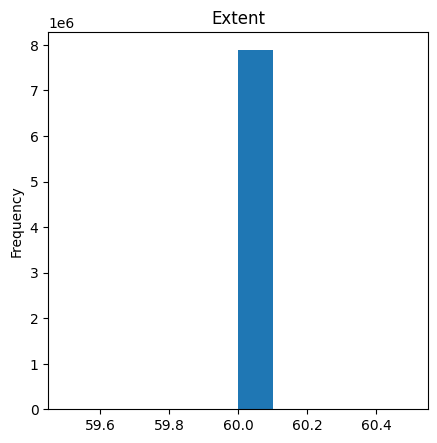

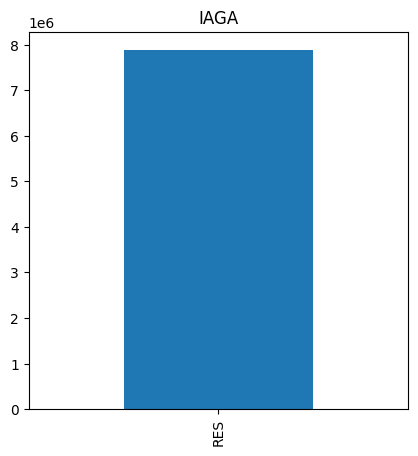

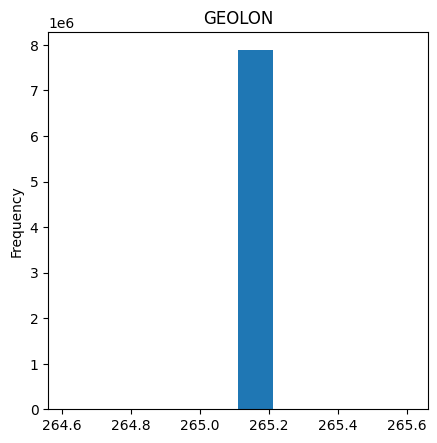

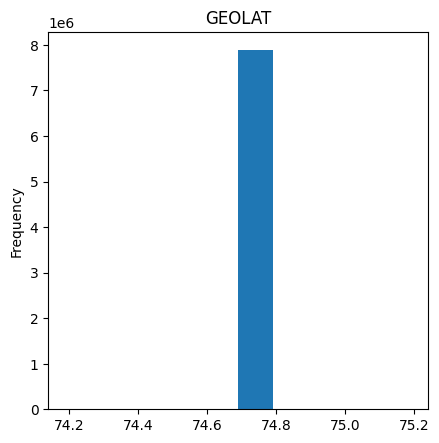

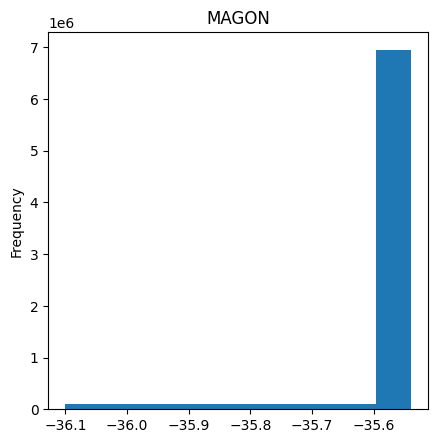

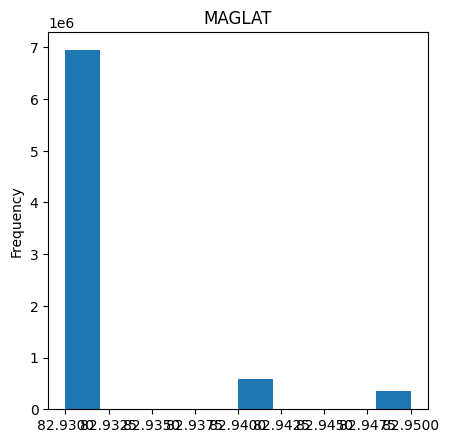

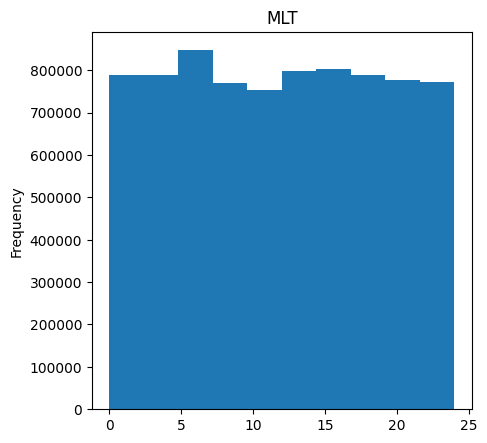

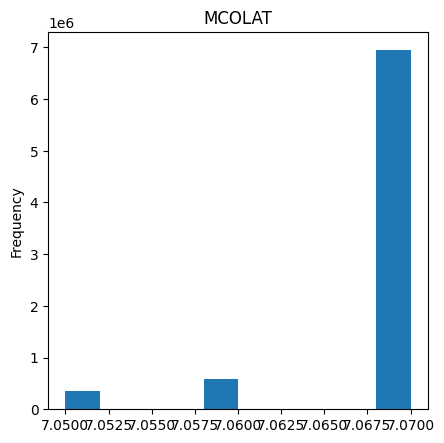

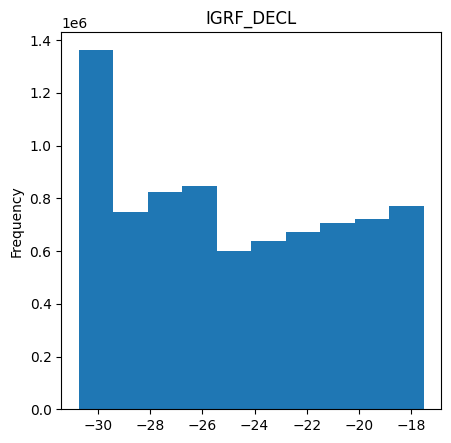

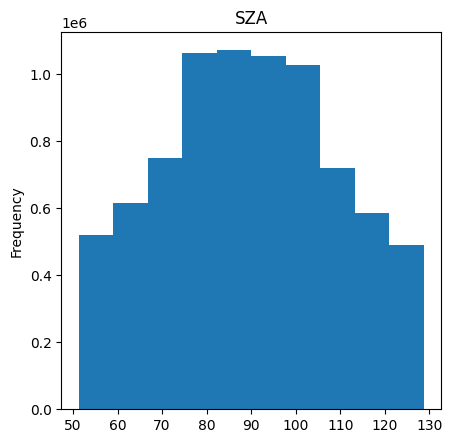

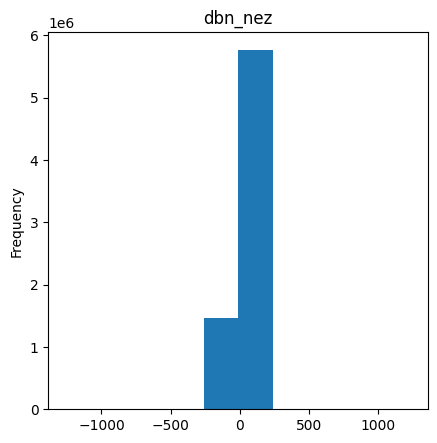

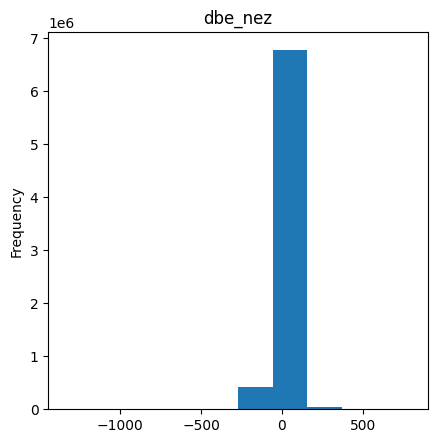

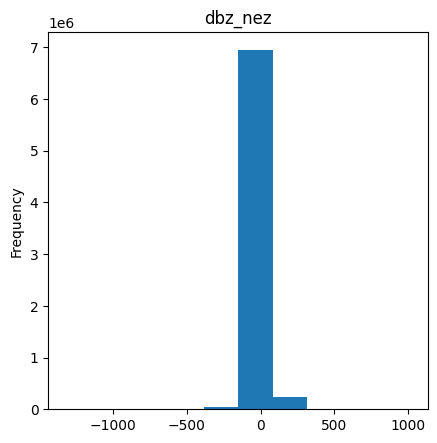

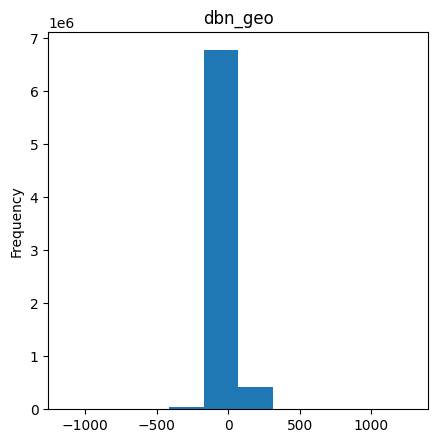

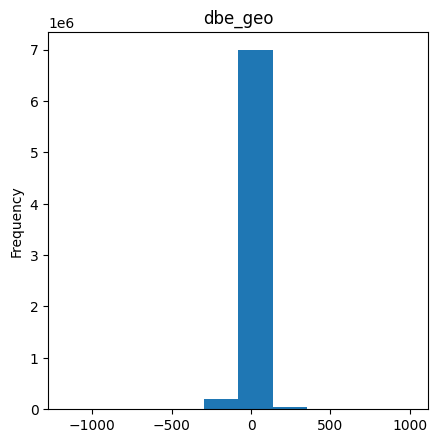

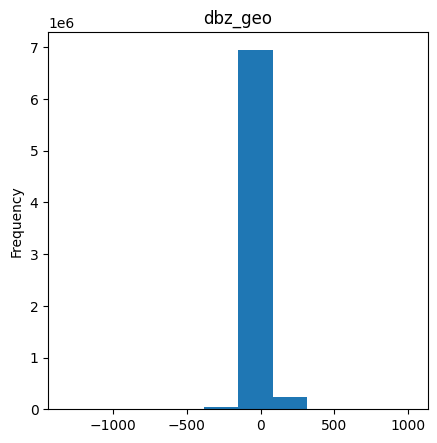

In [ ]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in df:
 if is_numeric_dtype(df[column]):
        num_list.append(column)
 elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)


### 3. Univaraite Analysis ###

# bar chart and histogram
for column in df:
       plt.figure(column, figsize = (4.9,4.9))
       plt.title(column)
       if is_numeric_dtype(df[column]):
               df[column].plot(kind = 'hist')
       elif is_string_dtype(df[column]):
       # show only the TOP 10 value count in each categorical data
              df[column].value_counts()[:10].plot(kind = 'bar')

/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_63162/299830278.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

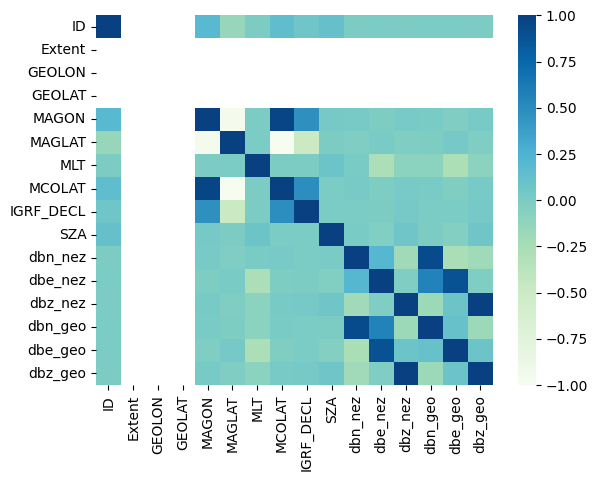

In [ ]:
### 4. Multivariate Analysis ###

# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu")